<a href="https://colab.research.google.com/github/Cesarb2/image_to_text_ai_project/blob/main/Grupo31_Fase1_TechChanllenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
# Tech Challenge: Prever Custos Médicos

O desafio consiste em desenvolver um modelo preditivo de regressão para prever os custos médicos individuais com base em variáveis como idade, gênero, IMC (Índice de Massa Corporal), número de filhos, se a pessoa é fumante ou não, e a região onde mora.

### Tarefas:
1. Explorar os dados (simulados ou utilizando datasets públicos).
2. Pré-processar os dados para adequar ao modelo de regressão.
3. Criar um modelo preditivo de regressão.
4. Treinar o modelo e avaliar sua performance utilizando métricas estatísticas.
5. Apresentar resultados visuais, como gráficos de previsões vs. valores reais.

### Nota:
- O código está formatado para ser rodado no Google Colab.
- Uma opção para utilizar o dataset da biblioteca `sklearn` está comentada, para experimentar com outros dados...
- Nesse momento estamos usando dados simulados

"""


In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ============================================
# 1. SIMULANDO OS DADOS
# ============================================

# Gerar dados simulados para o desafio
np.random.seed(42)
data = {
    'idade': np.random.randint(18, 65, 1000),
    'gênero': np.random.choice(['masculino', 'feminino'], 1000),
    'imc': np.random.uniform(15, 40, 1000),
    'filhos': np.random.randint(0, 5, 1000),
    'fumante': np.random.choice(['sim', 'não'], 1000),
    'região': np.random.choice(['nordeste', 'sudoeste', 'noroeste', 'sudeste'], 1000),
    'encargos': np.random.uniform(2000, 50000, 1000)  # Custos médicos (alvo)
}

# Criar o DataFrame com os dados simulados
df_simulado = pd.DataFrame(data)

# Exibir os primeiros dados
print("Exemplo dos dados simulados:")
print(df_simulado.head())

Exemplo dos dados simulados:
   idade     gênero        imc  filhos fumante    região      encargos
0     56  masculino  32.082384       0     sim  sudoeste  17242.619834
1     46   feminino  26.147568       2     sim   sudeste  14450.643236
2     32   feminino  21.840667       2     não  sudoeste   6204.382275
3     60   feminino  39.928113       2     sim  sudoeste   6315.979753
4     25  masculino  25.654533       1     sim  noroeste  11275.971931


In [3]:
# ============================================
# 2. OPÇÃO COM SKLEARN (COMENTADO  @CESAR: revisar com o Grupo)
# ============================================

# from sklearn.datasets import load_boston
# boston = load_boston()
# df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
# df_boston['PRICE'] = boston.target
# print(df_boston.head())

In [4]:
# ============================================
# 3. PRÉ-PROCESSAMENTO DOS DADOS
# ============================================

# Transformar variáveis categóricas em variáveis dummy (0 ou 1)
df_preprocessado = pd.get_dummies(df_simulado, drop_first=True)

# Separar variáveis independentes (X) e dependentes (y)
X = df_preprocessado.drop('encargos', axis=1)  # Variáveis preditoras
y = df_preprocessado['encargos']  # Variável alvo (custos médicos)

# Dividir os dados em conjunto de treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# ============================================
# 4. TREINAMENTO DO MODELO DE REGRESSÃO
# ============================================

# Instanciar o modelo de regressão linear ... @CESAR: Validar com o Estatístico do Grupo
modelo = LinearRegression()

# Treinar o modelo com o conjunto de treinamento
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# ============================================
# 5. AVALIAÇÃO DO MODELO
# ============================================

# Calcular o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas
print("\nAvaliação do modelo:")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


Avaliação do modelo:
Erro Quadrático Médio (MSE): 202005628.72625977
Coeficiente de Determinação (R²): -0.016094814291552684


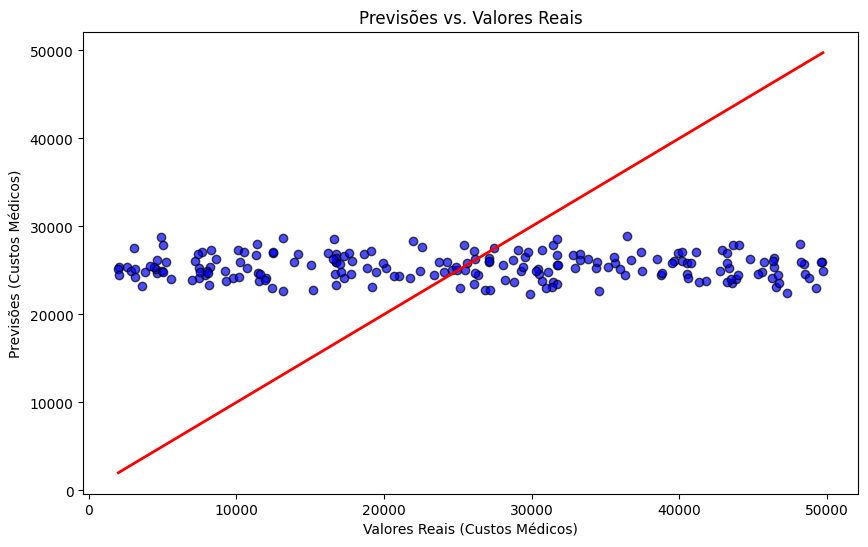

In [6]:
# ============================================
# 6. VISUALIZAÇÃO DOS RESULTADOS
# ============================================

# Comparar previsões com os valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Previsões vs. Valores Reais')
plt.xlabel('Valores Reais (Custos Médicos)')
plt.ylabel('Previsões (Custos Médicos)')
plt.show()

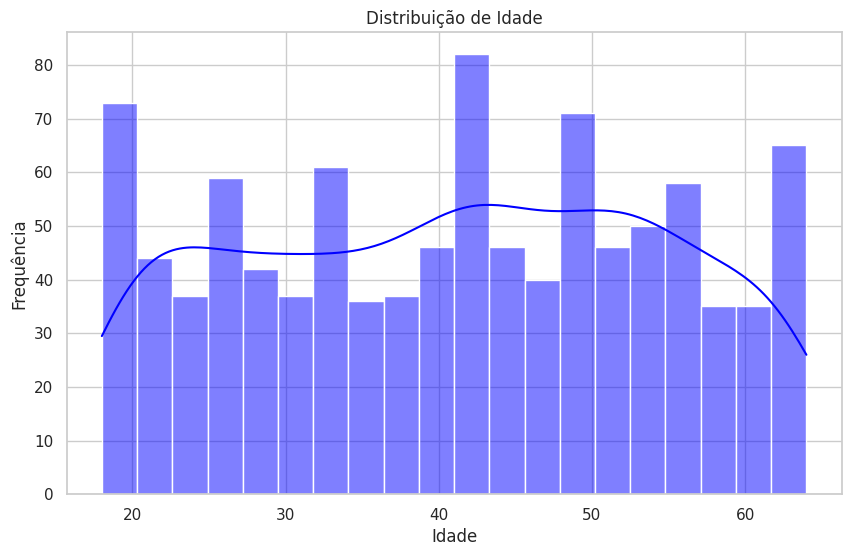

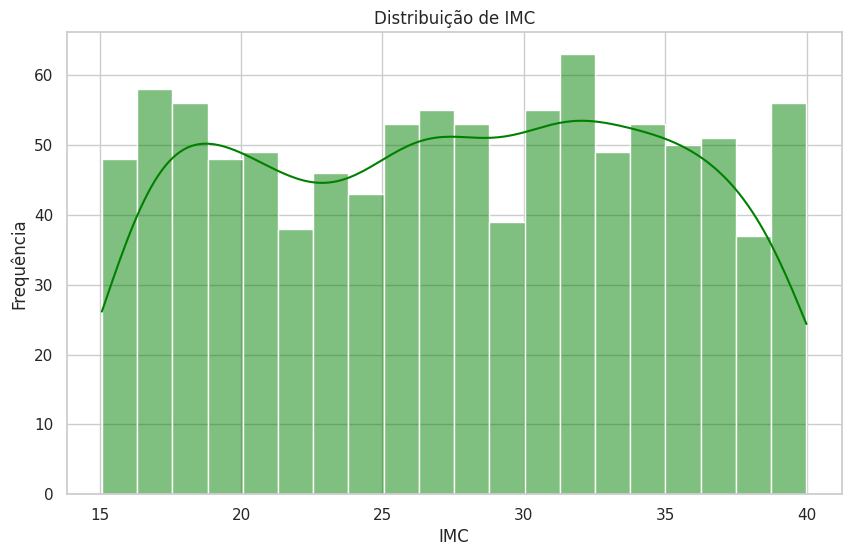

<ipython-input-7-53b1d1d9579e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_simulado, x='gênero', palette='Set2')


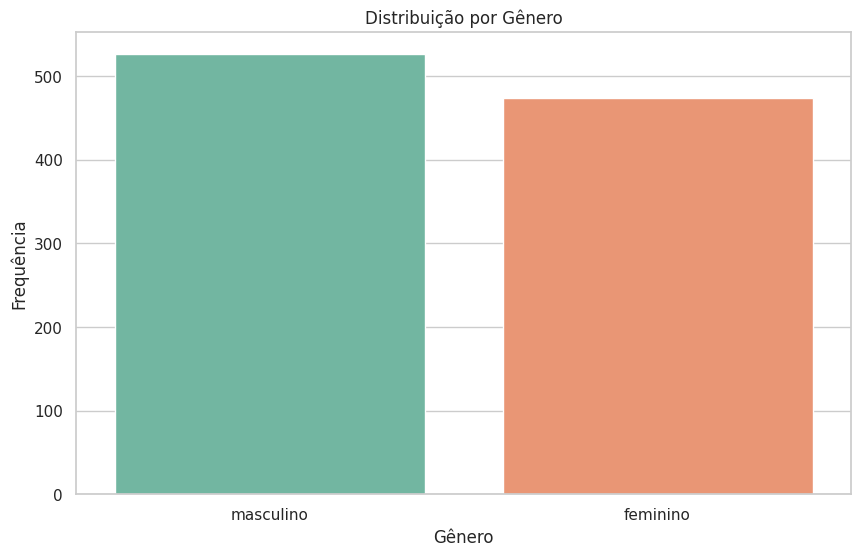

<ipython-input-7-53b1d1d9579e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_simulado, x='fumante', palette='Set1')


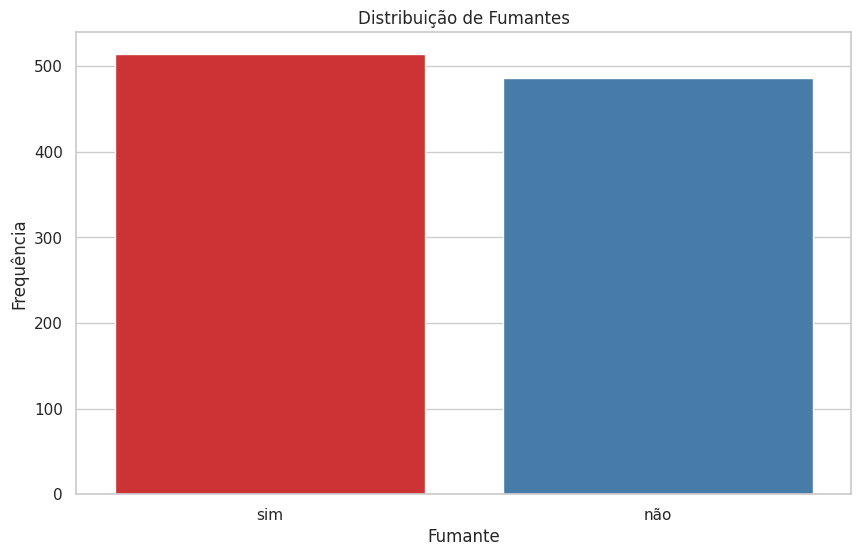

<ipython-input-7-53b1d1d9579e>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_simulado, x='região', palette='Set3')


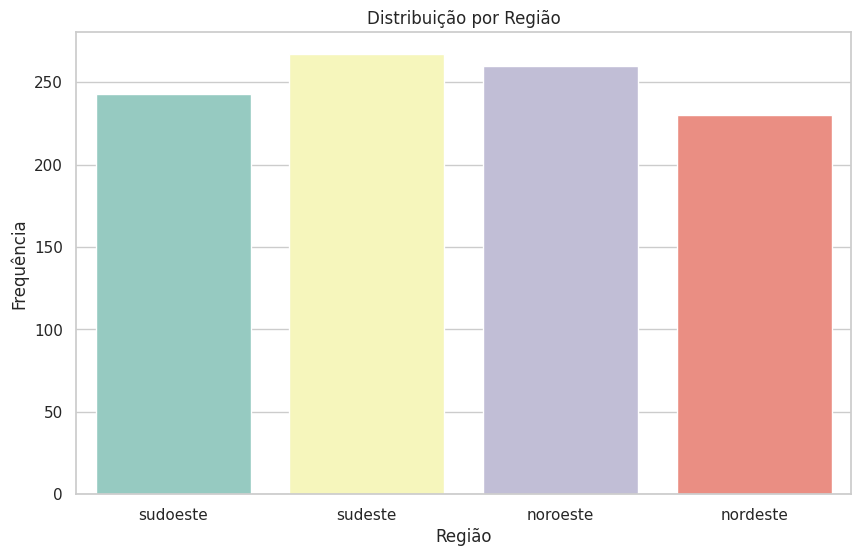

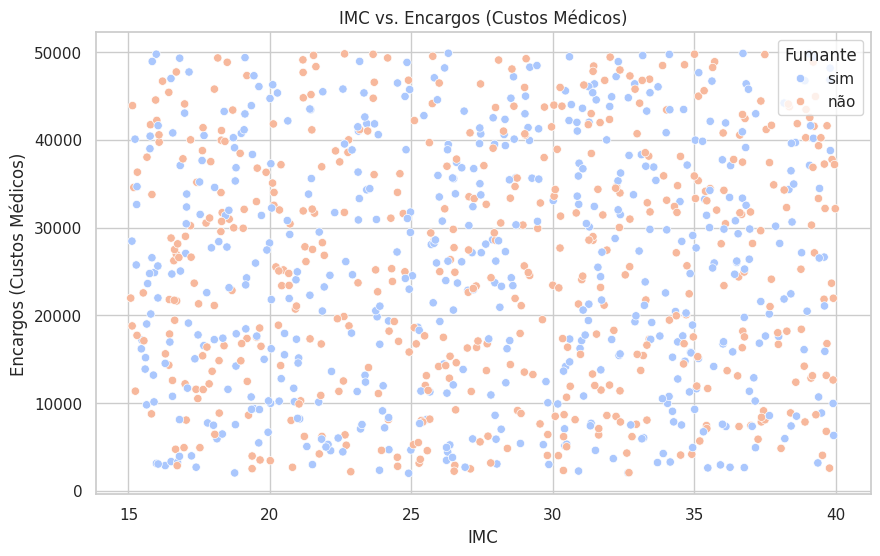

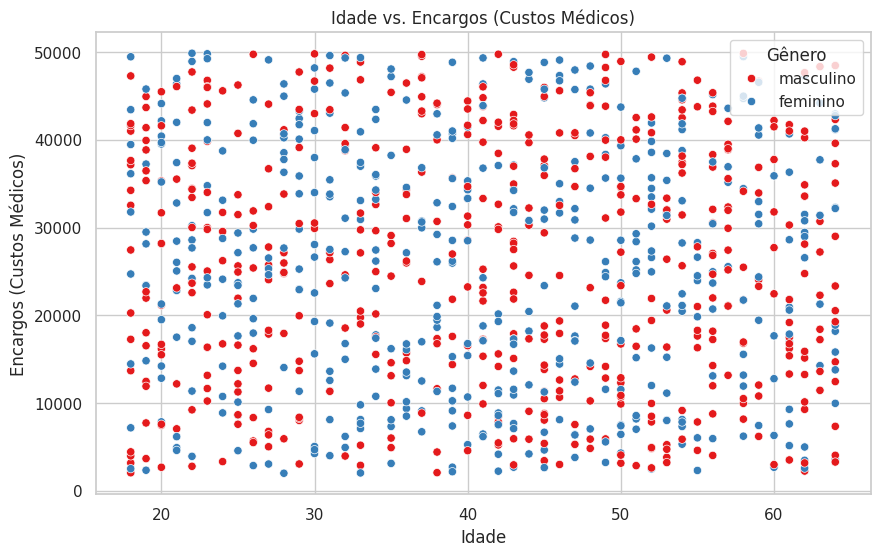

In [7]:
# ============================================
# 7. VISUALIZAÇÃO SIMPLES E INTUITIVA DOS DADOS
# ============================================

import seaborn as sns

# Configurar estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de distribuição de Idade
plt.figure(figsize=(10, 6))
sns.histplot(df_simulado['idade'], bins=20, kde=True, color='blue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Gráfico de distribuição do IMC
plt.figure(figsize=(10, 6))
sns.histplot(df_simulado['imc'], bins=20, kde=True, color='green')
plt.title('Distribuição de IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras para variáveis categóricas (Gênero)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_simulado, x='gênero', palette='Set2')
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras para variáveis categóricas (Fumante)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_simulado, x='fumante', palette='Set1')
plt.title('Distribuição de Fumantes')
plt.xlabel('Fumante')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras para variáveis categóricas (Região)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_simulado, x='região', palette='Set3')
plt.title('Distribuição por Região')
plt.xlabel('Região')
plt.ylabel('Frequência')
plt.show()

# Gráfico de dispersão entre IMC e Encargos (custos médicos)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_simulado, x='imc', y='encargos', hue='fumante', palette='coolwarm')
plt.title('IMC vs. Encargos (Custos Médicos)')
plt.xlabel('IMC')
plt.ylabel('Encargos (Custos Médicos)')
plt.legend(title='Fumante')
plt.show()

# Gráfico de dispersão entre Idade e Encargos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_simulado, x='idade', y='encargos', hue='gênero', palette='Set1')
plt.title('Idade vs. Encargos (Custos Médicos)')
plt.xlabel('Idade')
plt.ylabel('Encargos (Custos Médicos)')
plt.legend(title='Gênero')
plt.show()


Checklist baseado nas instruções do Tech Challenge:

1 - Exploração de Dados:

 Carregar a base de dados.
 Explorar as características dos dados (idade, gênero, IMC, filhos, fumante, região, encargos).
 Analisar estatísticas descritivas e visualizar distribuições relevantes.
2 - Pré-processamento de Dados:

 Limpar os dados, tratando valores ausentes (se necessário).
 Converter variáveis categóricas para formatos adequados à modelagem.
3 - Modelagem:

 Criar um modelo preditivo de regressão (ex: Regressão Linear, Árvores de Decisão).
 Dividir os dados em conjuntos de treinamento e teste.
4 - Treinamento e Avaliação do Modelo:

 Treinar o modelo com o conjunto de treinamento.

5- Validação Estatística:

 Validar o modelo com métricas estatísticas (p-value, intervalos de confiança).
 Apresentar resultados visuais (gráficos de previsões vs. valores reais).

6 - Relatório Final:

 Elaborar um relatório com análise dos resultados, insights e validação estatística.

7 - Entregáveis:

 Criar um vídeo apresentando o projeto (plataforma sugerida: YouTube).
 Enviar o link do GitHub com o código desenvolvido.
 Enviar o vídeo explicando o passo a passo do projeto.



| **Biblioteca** | **Descrição** |
|----------------|---------------|
| **NumPy**      | NumPy é usada para operações com arrays e funções matemáticas. Neste projeto, foi utilizada para gerar dados simulados. |
| **Pandas**     | Pandas é usada para manipulação e análise de dados tabulares. Foi utilizada para criar e explorar DataFrames. |
| **Seaborn**    | Seaborn é uma biblioteca de visualização de dados. Utilizada para criar gráficos de distribuição e barras de forma simples e intuitiva. |
| **Matplotlib** | Matplotlib é uma biblioteca de gráficos 2D. Usada para gerar gráficos de dispersão, comparando previsões com valores reais. |
| **Scikit-learn (sklearn)** | Biblioteca para aprendizado de máquina. Utilizada para modelagem e avaliação de regressão (Regressão Linear, divisão de dados, métricas de desempenho). |
